In [1]:
# Q3c i)
def count_digits_i(sentence):
    counter = 0
    for symbol in sentence:
        if symbol.isdigit():
            counter += 1
    return counter

print(count_digits_i("comp s491"))

3


In [2]:
# Q3c ii)
def count_digits_ii(sentence):
    return len([symbol for symbol in sentence if symbol.isdigit()])

print(count_digits_ii("comp s491"))

3


In [3]:
# Q3c iii)
def count_digits_iii(sentence):
    return sum(1 for symbol in sentence if symbol.isdigit())

print(count_digits_iii("comp s491"))

3


In [9]:
# Q3d
import urllib
import os

def get_file(filename, url):
    if not os.path.exists(filename):
        data = urllib.request.urlopen(url)
        image_read = data.read()
        
        with open(filename, "wb") as file:
            file.write(image_read)

!rm python.png
filename = "python.png"
url = "https://www.python.org/static/community_logos/python-logo.png" 
!ls -l
get_file(filename, url)
!ls -l

total 56
-rw-r--r-- 1 jupyter-s1265005 jupyter-s1265005 55343 Nov  7 21:44 s12650050a1.ipynb
total 104
-rw-r--r-- 1 jupyter-s1265005 jupyter-s1265005 45187 Nov  7 21:46 python.png
-rw-r--r-- 1 jupyter-s1265005 jupyter-s1265005 55343 Nov  7 21:44 s12650050a1.ipynb


In [5]:
# Q4 given code
import numpy as np

N = 50
np.random.seed(0)
ids = np.random.choice(np.arange(21000000, 22000000), size=(N,))
ml_scores = np.random.normal(70, 14, (N,)).astype(int).clip(0, 100)
dl_scores = (ml_scores * 50 / 70 + np.random.uniform(-20, 10, size=(N,))).astype(int).clip(0, 100)
arr = np.stack((np.concatenate((ids, ids)), [491] * N + [499] * N, np.concatenate((ml_scores, dl_scores))), axis=1)
np.random.shuffle(arr)

In [6]:
# Q4a

# i)
print(arr[0:5])

# ii)
print(arr.shape, arr.size, arr.dtype)

# iii)
mask_491 = arr[:,1] == 491
arr_491 = arr[mask_491]
print(arr_491[0:5], arr_491[:,2].max())

# iv)
mask_499 = arr[:,1] == 499
arr_499 = arr[mask_499]
print(arr_499[0:5], arr_499[:,2].max())

[[21170584      499       27]
 [21918301      491       69]
 [21359783      499       51]
 [21735831      491       82]
 [21674343      499       58]]
(100, 3) 300 int64
[[21918301      491       69]
 [21735831      491       82]
 [21963395      491       78]
 [21736326      491       81]
 [21882371      491       63]] 100
[[21170584      499       27]
 [21359783      499       51]
 [21674343      499       58]
 [21430835      499       27]
 [21882371      499       44]] 73


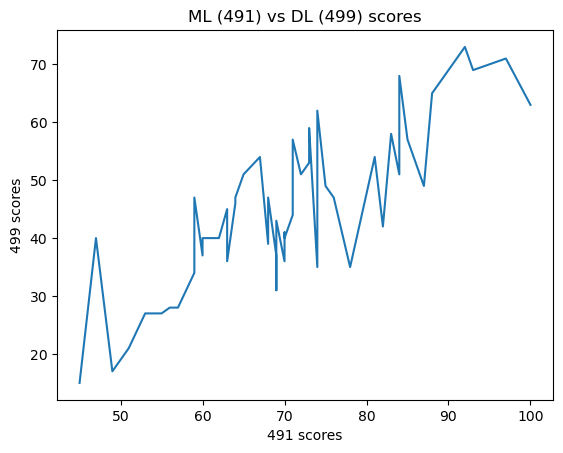

In [7]:
# Q4b
import matplotlib.pyplot as plt

# sorted by id for two subject results
sorted_arr_491 = arr_491[arr_491[:, 0].argsort()]
sorted_arr_499 = arr_499[arr_499[:, 0].argsort()]

# join the dataset together
dataset = np.hstack((sorted_arr_491, sorted_arr_499))

# sorted by 491 marks , x-axis
sorted_dataset = dataset[dataset[:, 2].argsort()]

# Get the data columns
x = sorted_dataset[:,2]
y = sorted_dataset[:,5]

plt.plot(x, y)
plt.title("ML (491) vs DL (499) scores")
plt.xlabel("491 scores")
plt.ylabel("499 scores"); # add ; to suppress data type output 

In [8]:
# Q4c
import pandas as pd

# i)
# Create a DataFrame with required column names
df = pd.DataFrame({"id": arr[:,0],
                      "course": arr[:,1],
                      "score": arr[:,2]})

# ii)
print(df.head())
print(df.tail())

# iii)
s = df["score"]
print(s.describe())

# iv)
df.groupby("course")["score"].describe()

         id  course  score
0  21170584     499     27
1  21918301     491     69
2  21359783     499     51
3  21735831     491     82
4  21674343     499     58
          id  course  score
95  21532165     499     68
96  21839052     499     47
97  21887633     491     71
98  21942179     499     47
99  21724115     491     97
count    100.000000
mean      57.580000
std       18.254752
min       15.000000
25%       44.750000
50%       58.500000
75%       70.000000
max      100.000000
Name: score, dtype: float64


,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
491,50.0,70.16,12.849776,45.0,62.25,69.5,77.50,100.0
499,50.0,45.00,13.608221,15.0,36.25,44.5,53.75,73.0


#### Q4c v)
As for the course 491, Yes, there is no student failed in ML course (491). The minimum value for course 491 is 45, which is still greater than the passing score 40.

As for the course 499, No, there are students failed in DL course (499). The minimum value for course 499 is 15, which is smaller than the passing score 40. 
P.S. Also the 25th quartile is only 36.25, indicating that at least 1/4 of the students failed in the course 499.